In [1]:
import numpy as np
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
%matplotlib inline

/Users/khalidsalama/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/khalidsalama/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/khalidsalama/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will 

In [2]:
sample_size = 5000

In [3]:
data1,target1 = datasets.make_circles(n_samples=sample_size, factor=.1, noise=0.2)
data2,target2 = datasets.make_circles(n_samples=sample_size, factor=.5, noise=0.2)
target2 = 1-target2

data3,target3 = datasets.make_moons(n_samples=sample_size,noise=0.2)
data3[:,0] = (2 * (data3[:, 0]-(-1))/(3))-1
data3[:,1] = (2 * (data3[:, 1]-(-1))/(2))-1
data4,target4 = datasets.make_moons(n_samples=sample_size,noise=0.2)

temp = np.copy(data4[:, 0])
data4[:, 0] = data4[:, 1]
data4[:, 1] = temp
data4[:,0] = (2 * (data4[:, 0]-(-1))/(2))-1
data4[:,1] = (2 * (data4[:, 1]-(-1))/(3))-1

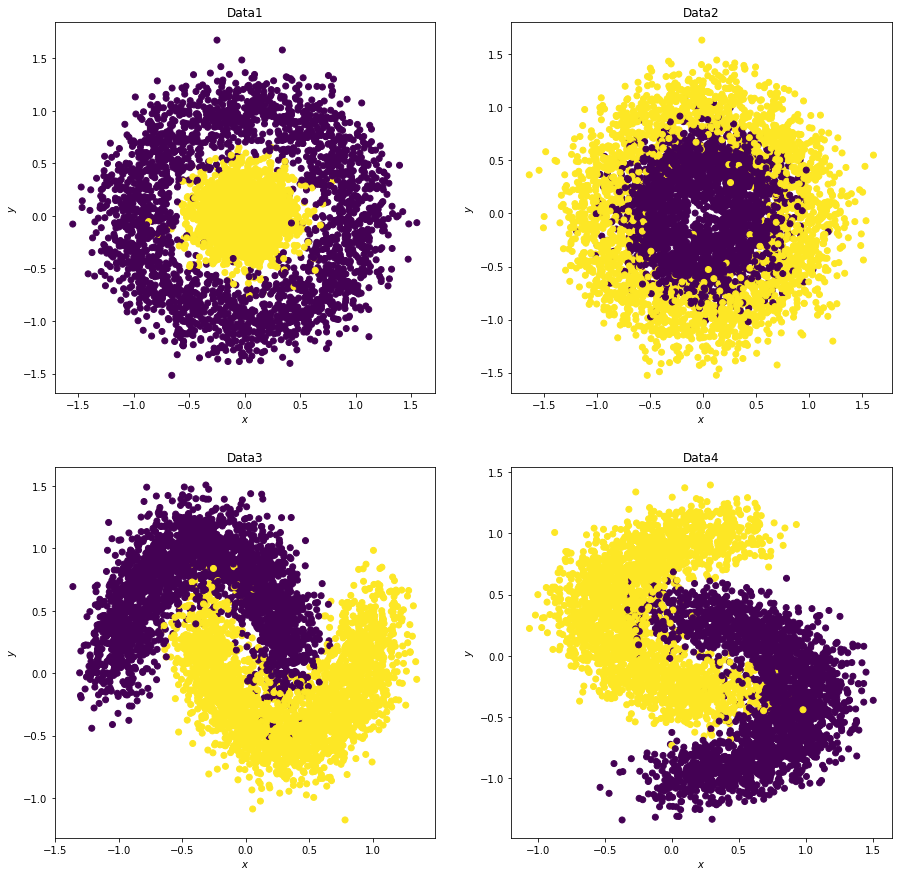

In [4]:
plt.close('all')
plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
plt.title("Data1")
plt.scatter(data1[:,0],data1[:,1],c=target1)
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.subplot(2,2,2)
plt.title("Data2")
plt.scatter(data2[:,0],data2[:,1],c=target2)
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.subplot(2,2,3)
plt.title("Data3")
plt.scatter(data3[:,0],data3[:,1],c=target3)
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.subplot(2,2,4)
plt.title("Data4")
plt.scatter(data4[:,0],data4[:,1],c=target4)
plt.xlabel("$x$")
plt.ylabel("$y$")

In [5]:
data = np.concatenate((data1, data2, data3, data4), axis=0)
target = np.concatenate((target1,target2,target3,target4),axis=0)

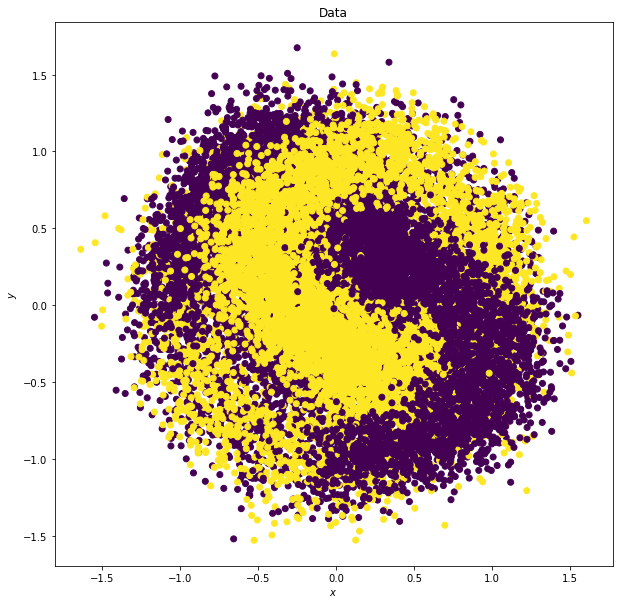

In [6]:
plt.close('all')
plt.figure(figsize=(10, 10))
plt.title("Data")
plt.scatter(data[:,0],data[:,1],c=target)
plt.xlabel("$x$")
plt.ylabel("$y$")

In [7]:
alpha = np.concatenate((np.zeros(sample_size),np.ones(sample_size),np.zeros(sample_size),np.ones(sample_size)), axis=0)
beta = np.concatenate((np.zeros(sample_size),np.zeros(sample_size),np.ones(sample_size),np.ones(sample_size)), axis=0)

In [8]:
data_frame = pd.DataFrame(data = data,columns=["x","y"])
data_frame["alpha"] = pd.Series(alpha).map(lambda v: 'ax01' if v==0 else 'ax02')
data_frame["beta"] = pd.Series(beta).map(lambda v: 'bx01' if v==0 else 'bx02')
data_frame["target"] = pd.Series(target).map(lambda v: 'negative' if v==0 else 'positive')

In [9]:
data_frame.describe()

,x,y
count,20000.000000,20000.000000
mean,0.060228,0.062454
std,0.573838,0.575404
min,-1.638896,-1.525801
25%,-0.336140,-0.334343
50%,0.048452,0.054045
75%,0.476554,0.476462
max,1.603750,1.673985


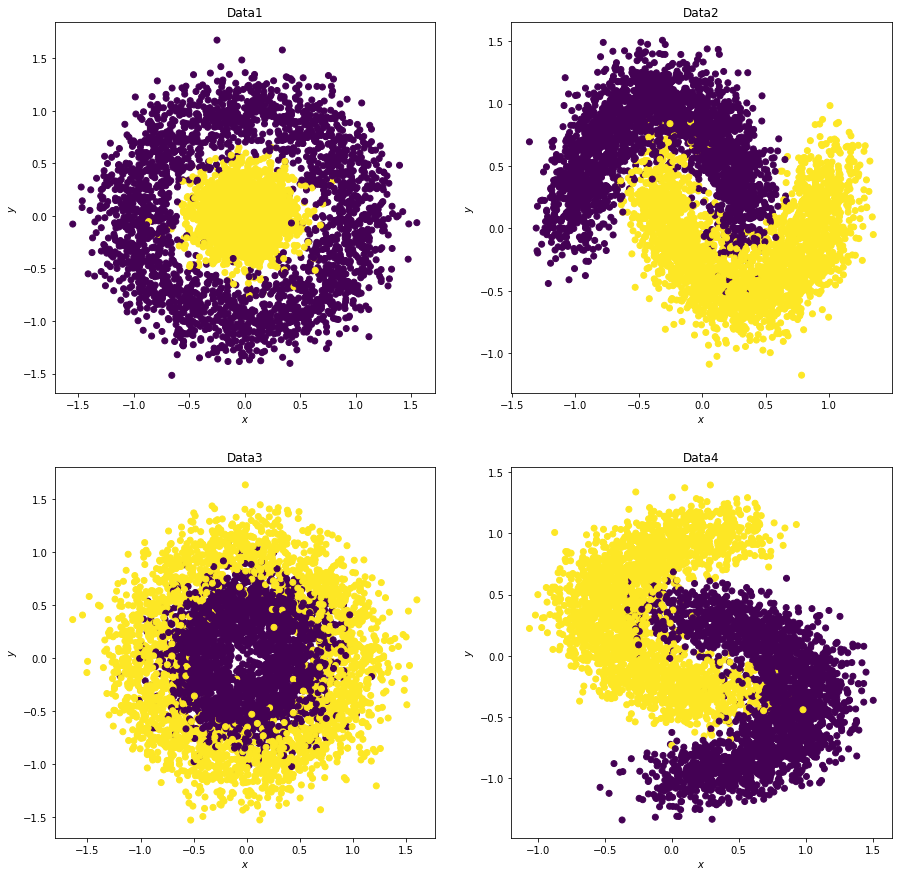

In [10]:
plt.close('all')
plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
plt.title("Data1")
data1 = data_frame[ (data_frame.alpha=='ax01') & (data_frame.beta=='bx01') ]
plt.scatter(data1.x,data1.y,c=data1.target.map(lambda v: 1 if v=='positive' else 0))
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.subplot(2,2,2)
plt.title("Data2")
data2 = data_frame[ (data_frame.alpha=='ax01') & (data_frame.beta=='bx02') ]
plt.scatter(data2.x,data2.y,c=data2.target.map(lambda v: 1 if v=='positive' else 0))
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.subplot(2,2,3)
plt.title("Data3")
data3 = data_frame[ (data_frame.alpha=='ax02') & (data_frame.beta=='bx01') ]
plt.scatter(data3.x,data3.y,c=data3.target.map(lambda v: 1 if v=='positive' else 0))
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.subplot(2,2,4)
plt.title("Data4")
data4 = data_frame[ (data_frame.alpha=='ax02') & (data_frame.beta=='bx02') ]
plt.scatter(data4.x,data4.y,c=data4.target.map(lambda v: 1 if v=='positive' else 0))
plt.xlabel("$x$")
plt.ylabel("$y$")

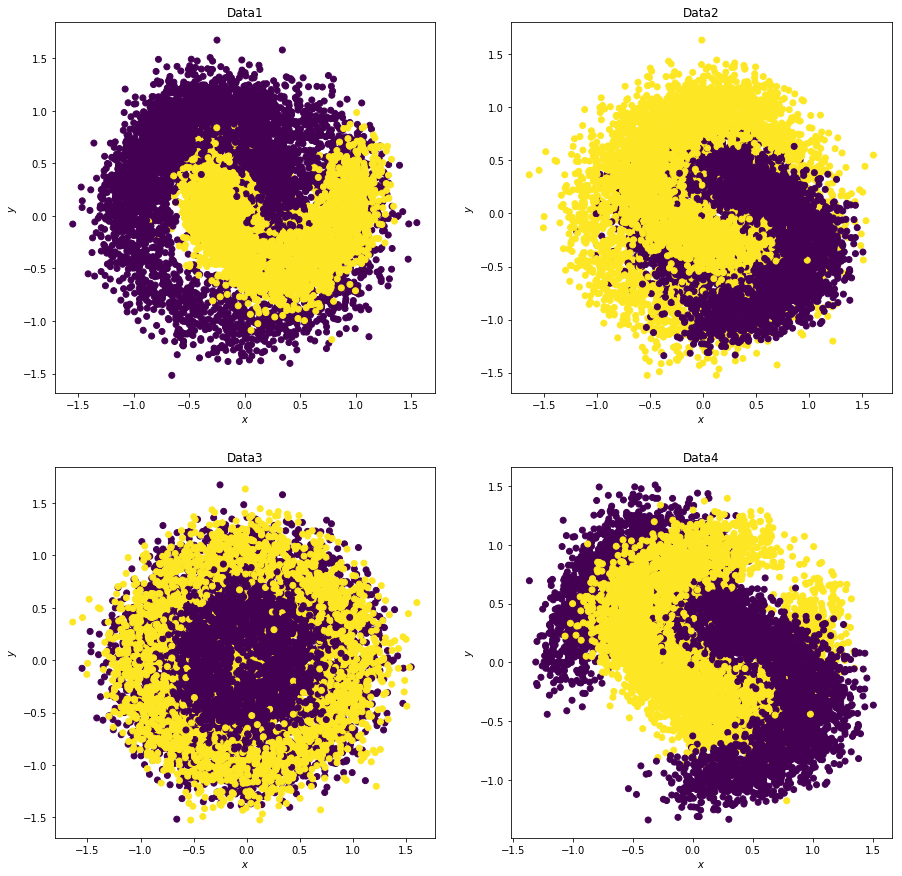

In [11]:
plt.close('all')
plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
plt.title("Data1")
data1 = data_frame[ (data_frame.alpha=='ax01')]
plt.scatter(data1.x,data1.y,c=data1.target.map(lambda v: 1 if v=='positive' else 0))
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.subplot(2,2,2)
plt.title("Data2")
data2 = data_frame[ (data_frame.alpha=='ax02')]
plt.scatter(data2.x,data2.y,c=data2.target.map(lambda v: 1 if v=='positive' else 0))
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.subplot(2,2,3)
plt.title("Data3")
data3 = data_frame[(data_frame.beta=='bx01') ]
plt.scatter(data3.x,data3.y,c=data3.target.map(lambda v: 1 if v=='positive' else 0))
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.subplot(2,2,4)
plt.title("Data4")
data4 = data_frame[(data_frame.beta=='bx02') ]
plt.scatter(data4.x,data4.y,c=data4.target.map(lambda v: 1 if v=='positive' else 0))
plt.xlabel("$x$")
plt.ylabel("$y$")

In [12]:
splitter =  model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
splits = list(splitter.split(X=data_frame.iloc[:,[0,1,2,3]],y=data_frame.target))
learn_index = splits[0][0]
test_index = splits[0][1]

learn_df = data_frame.iloc[learn_index,:]


splitter =  model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
splits = list(splitter.split(X=learn_df.iloc[:,[0,1,2,3]],y=learn_df.target))
train_index = splits[0][0]
valid_index = splits[0][1]


train_df = learn_df.iloc[train_index,:]
print(len(train_df))

valid_df = learn_df.iloc[valid_index,:]
print(len(valid_df))

test_df = data_frame.iloc[test_index,:]
print(len(test_df))


12000
3000
5000


In [13]:
print(pd.Series(train_df.target).value_counts())
print(pd.Series(valid_df.target).value_counts())
print(pd.Series(test_df.target).value_counts())


negative    6000
positive    6000
Name: target, dtype: int64
positive    1500
negative    1500
Name: target, dtype: int64
positive    2500
negative    2500
Name: target, dtype: int64


In [16]:
train_df.to_csv(path_or_buf="data/train-data.csv", header=False, index=True)
valid_df.to_csv(path_or_buf="data/valid-data.csv", header=False, index=True)
test_df.to_csv(path_or_buf="data/test-data.csv", header=False, index=True)